## Numpy

In [4]:
import numpy as np

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [6]:
import random
import timeit

%timeit 
random_array_np=np.random.randint(0,100,10)

%timeit
random_array_regular=random.sample(range(100),10)

### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [8]:
from math import sin, cos

%%timeit
sin_cos_sum_np=np.sin(random_array_np)+np.cos(random_array_np)
sin_cos_sum_regular=[sin(x)+cos(x) for x in random_array_regular]


UsageError: Line magic function `%%timeit` not found.


### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [29]:
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    return np.sum(x ** 3)

def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    return np.mean((x - np.mean(x)) ** 4)

### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [35]:
a_ij=np.arange(1,10).reshape(9,1)*np.arange(1,10)
print(a_ij)

[[ 1  2  3  4  5  6  7  8  9]
 [ 2  4  6  8 10 12 14 16 18]
 [ 3  6  9 12 15 18 21 24 27]
 [ 4  8 12 16 20 24 28 32 36]
 [ 5 10 15 20 25 30 35 40 45]
 [ 6 12 18 24 30 36 42 48 54]
 [ 7 14 21 28 35 42 49 56 63]
 [ 8 16 24 32 40 48 56 64 72]
 [ 9 18 27 36 45 54 63 72 81]]


### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [40]:
points = np.random.random((10, 5))

def points_distance(points):
    return np.sqrt(np.sum((points[:, None] - points) ** 2, axis=-1))

print(points_distance(points))

[[0.         1.09283977 0.85462292 1.39440153 0.71124155 1.15231559
  1.25738356 1.25497238 1.16730468 0.97488041]
 [1.09283977 0.         0.75382766 0.60367623 0.70674988 0.71611588
  0.44889825 0.57525185 0.93844353 0.78209477]
 [0.85462292 0.75382766 0.         1.18152371 0.71124635 1.19839813
  0.60203512 1.0219056  0.50800198 1.05084565]
 [1.39440153 0.60367623 1.18152371 0.         0.85043564 0.48036883
  0.84966543 0.37579552 1.14913414 0.86859111]
 [0.71124155 0.70674988 0.71124635 0.85043564 0.         0.622301
  0.8109028  0.62368172 0.80395268 0.56756667]
 [1.15231559 0.71611588 1.19839813 0.48036883 0.622301   0.
  1.00563519 0.41811429 1.23880953 0.60229202]
 [1.25738356 0.44889825 0.60203512 0.84966543 0.8109028  1.00563519
  0.         0.71512645 0.69578177 0.99121173]
 [1.25497238 0.57525185 1.0219056  0.37579552 0.62368172 0.41811429
  0.71512645 0.         1.01561866 0.79781006]
 [1.16730468 0.93844353 0.50800198 1.14913414 0.80395268 1.23880953
  0.69578177 1.0156186

### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [27]:
collection=np.random.random((10,2))

### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn. 

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a| 
$$

np. 

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`). 
Może Ci się przydać metoda `cumprod`.

## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

(252, 187, 4)


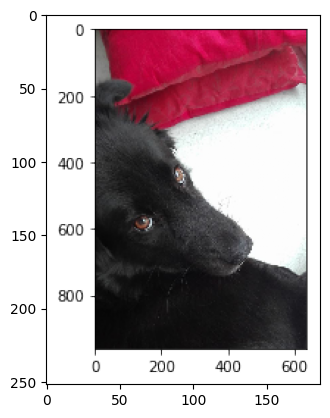

In [4]:
img = mpimg.imread('images/doggo.png')
plt.imshow(img);

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

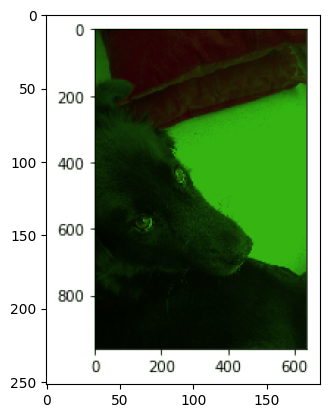

In [13]:
grayscale_img=img*[0.2126,0.7152,0.0722,1]
plt.imshow(grayscale_img);

### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$

In [26]:
lambdas=t=np.arange(0, 1, 0.1)
x1 = np.array([2,14,23])
x2 = np.array([8,92,12])
interpolated_points = np.outer(lambdas, x1) + np.outer(1 - lambdas, x2)
    
print(interpolated_points)

[[ 8.  92.  12. ]
 [ 7.4 84.2 13.1]
 [ 6.8 76.4 14.2]
 [ 6.2 68.6 15.3]
 [ 5.6 60.8 16.4]
 [ 5.  53.  17.5]
 [ 4.4 45.2 18.6]
 [ 3.8 37.4 19.7]
 [ 3.2 29.6 20.8]
 [ 2.6 21.8 21.9]]
